In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.wrappers.scikit_learn import KerasClassifier
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [3]:
data = pd.read_csv('outlier_remove.csv')

In [4]:
data

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics,stats_dict_tuple,num_sentences,num_words,num_syllables,readability,grade,richness,Language,neg,neu,pos,compound,compound_vader_polarity,artist_popularity
0,1mTxphc9naXMLE9qfMkEVh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0309,['The Cotton Candy Blues Band'],0.593,187286,0.450,0,0.001870,2,0.3340,-10.679,1,Early in the morning,0,1940,0.0307,112.054,0.454,1940,1940-01-01,The Cotton Candy Blues Band,The Cotton Candy Blues Band187286Early in the ...,0,"money on the table , i ain ' tryna play with y...","({'num_sentences': 6, 'num_words': 783, 'num_s...",6.0,783.0,735.0,-5.036,College Graduate,0.177977,en,0.102,0.846,0.052,-0.9857,-1.0,0.000000
1,2Tp1yCGNjjZ39HTEnKaqhx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9760,['The Keynotes'],0.369,103333,0.228,0,0.000000,1,0.1500,-9.628,1,I Don't Know,0,1945,0.0300,82.394,0.572,1945,1945-01-01,The Keynotes,The Keynotes103333I Don't Know0.9760.3690.2280...,0,"i don ' know why i love you like i do oh , my ...","({'num_sentences': 4, 'num_words': 186, 'num_s...",4.0,186.0,152.0,90.502,5th Grade,0.076503,en,0.294,0.455,0.251,-0.8895,-1.0,5.000000
2,3plzStfrkTOq9lehqqI3bG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3660,['EOR'],0.631,324882,0.682,0,0.000000,9,0.3380,-10.486,0,Till,0,1946,0.0417,150.061,0.386,1946,1946-01-01,EOR,EOR324882Till0.3660.6310.68200.090.338-10.4860...,0,"hook : i ' just tryna be my own man , my own m...","({'num_sentences': 6, 'num_words': 495, 'num_s...",6.0,495.0,527.0,33.028,College Level,0.254582,en,0.064,0.800,0.136,0.9856,1.0,46.000000
3,2MGhUOnAifh3znlInWnywc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9260,['Lowell Fulson'],0.670,170333,0.351,0,0.005310,0,0.1680,-5.714,1,Fulson Blues,0,1945,0.0693,140.253,0.580,1945,1945-01-01,Lowell Fulson,Lowell Fulson170333Fulson Blues0.9260.670.3510...,0,i ain ' heard your voice in such as long time ...,"({'num_sentences': 1, 'num_words': 183, 'num_s...",1.0,183.0,179.0,-61.661,College Graduate,0.191257,en,0.109,0.817,0.074,-0.5831,-1.0,38.000000
4,1vDRvO1X021HlJY2NnqUU2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9620,['Sonny Boy Williamson I'],0.572,186227,0.164,0,0.003460,0,0.2470,-15.842,1,Down South,0,1945,0.0471,78.439,0.661,1945,1945-01-01,Sonny Boy Williamson I,Sonny Boy Williamson I186227Down South0.9620.5...,0,hobo blues 3 : 22 trk yank rachel - vocal & gu...,"({'num_sentences': 8, 'num_words': 486, 'num_s...",8.0,486.0,434.0,69.626,9th Grade,0.200000,en,0.034,0.913,0.053,0.6788,1.0,60.848402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66447,6h2t5HKOpHjpou4cHA5OER,Cocky,Cocky,Kid Rock,0.1610,0.617,237507.0,0.921,0.000000,9.0,0.0887,-3.200,1.0,0.1790,184.028,4.0,0.688,64du8CiAmKAzVswhA3RK4r,2001-11-19,2001.0,237507.0,Kid Rock237507Cocky0.1610.6170.920999999999999...,0.1610,['Kid Rock'],0.617,237507,0.921,1,0.000000,9,0.0887,-3.200,1,Cocky,55,2001-11-19,0.1790,184.028,0.688,2001,2001-01-01,Kid Rock,Kid Rock237507Cocky0.1610.6170.92110.090.0887-...,1,"guess who ' back i used to be broke , confused...","({'num_sentences': 5, 'num_words': 528, 'num_s...",5.0,528.0,586.0,5.758,College Graduate,0.282443,en,0.108,0.780,0.112,0.9189,1.0,72.000000
66448,6h3YJ05

In [5]:
acoustic_col= ['acousticness_y','danceability_y','duration_ms_y','energy_y','explicit','instrumentalness_y','key_y',
       'liveness_y','loudness_y','mode_y','speechiness_y','tempo_y','valence_y']
lyrics_col = ['num_words','num_syllables','readability','richness','compound','artist_popularity']

In [6]:
df = data [acoustic_col+lyrics_col+['popularity']]

In [7]:
df.shape

(66452, 20)

In [9]:
#sns.distplot(df['popularity'],color='g')

In [8]:
y = df['popularity'].copy()
X=df[acoustic_col+lyrics_col].copy()

In [9]:
X.shape

(66452, 19)

In [12]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y,train_size=0.8,random_state=1234)

In [12]:
scale_features= X.drop(['explicit','mode_y'],axis=1).columns

In [13]:
scaler = StandardScaler()
scaler.fit(X_train[scale_features])
X_train[scale_features]= scaler.transform(X_train[scale_features])
X_test[scale_features]= scaler.transform(X_test[scale_features])

In [14]:
input_nodes = X_train.shape[1]
output_nodes = 1

In [30]:
model = Sequential()
model.add(Input((input_nodes,)))
model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3, seed=0))
model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3, seed=1))
model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3, seed=2))
model.add(Dense(output_nodes, activation="linear"))

optimizer = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 136,961
Trainable params: 136,961
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
X_train = np.asarray(X_train).astype(np.float32)

In [19]:
history = model.fit(X_train,
        y_train,
        batch_size=128,
        epochs=15,
        verbose=1,
        )

Epoch 1/15
416/416 [==============================] - 1s 2ms/step - loss: 282.0994 - mean_squared_error: 282.0994
Epoch 2/15
416/416 [==============================] - 1s 1ms/step - loss: 192.1465 - mean_squared_error: 192.1465
Epoch 3/15
416/416 [==============================] - 1s 1ms/step - loss: 184.7247 - mean_squared_error: 184.7247
Epoch 4/15
416/416 [==============================] - 1s 1ms/step - loss: 180.8299 - mean_squared_error: 180.8299
Epoch 5/15
416/416 [==============================] - 1s 1ms/step - loss: 178.5840 - mean_squared_error: 178.5840
Epoch 6/15
416/416 [==============================] - 1s 2ms/step - loss: 177.3492 - mean_squared_error: 177.3492
Epoch 7/15
416/416 [==============================] - 1s 2ms/step - loss: 175.6944 - mean_squared_error: 175.6944
Epoch 8/15
416/416 [==============================] - 1s 2ms/step - loss: 173.1383 - mean_squared_error: 173.1383
Epoch 9/15
416/416 [==============================] - 1s 2ms/step - loss: 171.8948 - mea

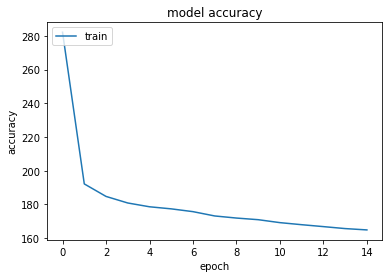

In [20]:
plt.plot(history.history['mean_squared_error'],color = 'g')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:",mae)
print("RMSE:",rmse)

MAE: 10.574926298536312
RMSE: 13.383873646517705


In [29]:
def NN():
    model = Sequential()
    model.add(Input((input_nodes,)))
    model.add(Dense(256, activation="relu"))
    # model.add(Dropout(0.3, seed=0))
    model.add(Dense(256, activation="relu"))
    # model.add(Dropout(0.3, seed=1))
    model.add(Dense(256, activation="relu"))
    # model.add(Dropout(0.3, seed=2))
    model.add(Dense(output_nodes, activation="linear"))

    optimizer = keras.optimizers.Adam(lr=0.001)

    model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])
    return model

clf=KerasClassifier(build_fn=NN, verbose=1)
batch_size = [32, 64, 128, 256]
epochs = [10,11,12,13,14,15,16]
search_spaces=dict(batch_size=batch_size,epochs=epochs,lr= lr)

In [14]:
def NeuN(lr):
    model = Sequential()
    model.add(Input((input_nodes,)))
    model.add(Dense(256, activation="relu"))
    # model.add(Dropout(0.3, seed=0))
    model.add(Dense(256, activation="relu"))
    # model.add(Dropout(0.3, seed=1))
    model.add(Dense(256, activation="relu"))
    # model.add(Dropout(0.3, seed=2))
    model.add(Dense(output_nodes, activation="linear"))

    optimizer = keras.optimizers.Adam(lr=lr)

    model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])
    return model


clf1=KerasClassifier(build_fn=NeuN, verbose=1)
batch_size = [32, 64, 128, 256]
epochs = [10,11,12,13,14,15,16]
lr = [0.001,0.01,0.1,0.2]
search_spaces=dict(batch_size=batch_size,epochs=epochs,lr= lr)

In [35]:
def clf_grid_cv(clf,search_spaces):
    grid = GridSearchCV(estimator=clf, param_grid=search_spaces,cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
    grid_result=grid.fit(X_train, y_train)
    
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    print('---------------------------------------------------------')
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("Accuracy : %f ( Std : %f) with: %r" % (mean, stdev, param))
    return grid_result

In [36]:
grid_result=clf_grid_cv(clf,search_spaces)

Epoch 1/16
831/831 [==============================] - 1s 1ms/step - loss: 238.7597 - mean_squared_error: 238.7597
Epoch 2/16
831/831 [==============================] - 1s 1ms/step - loss: 187.9417 - mean_squared_error: 187.9417
Epoch 3/16
831/831 [==============================] - 1s 1ms/step - loss: 182.4817 - mean_squared_error: 182.4817
Epoch 4/16
831/831 [==============================] - 1s 1ms/step - loss: 180.1310 - mean_squared_error: 180.1310
Epoch 5/16
831/831 [==============================] - 1s 1ms/step - loss: 178.1337 - mean_squared_error: 178.1337
Epoch 6/16
831/831 [==============================] - 1s 1ms/step - loss: 175.5619 - mean_squared_error: 175.5619
Epoch 7/16
831/831 [==============================] - 1s 1ms/step - loss: 174.2545 - mean_squared_error: 174.2545
Epoch 8/16
831/831 [==============================] - 1s 1ms/step - loss: 172.9072 - mean_squared_error: 172.9072
Epoch 9/16
831/831 [==============================] - 1s 1ms/step - loss: 171.2346 - mea

In [37]:
model = Sequential()
model.add(Input((input_nodes,)))
model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3, seed=0))
model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3, seed=1))
model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3, seed=2))
model.add(Dense(output_nodes, activation="linear"))

optimizer = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])

In [38]:
history1 = model.fit(X_train,
        y_train,
        batch_size=64,
        epochs=16,
        verbose=1,
        )

Epoch 1/16
831/831 [==============================] - 1s 2ms/step - loss: 241.0671 - mean_squared_error: 241.0671
Epoch 2/16
831/831 [==============================] - 1s 1ms/step - loss: 187.5147 - mean_squared_error: 187.5147
Epoch 3/16
831/831 [==============================] - 1s 2ms/step - loss: 182.6440 - mean_squared_error: 182.6440
Epoch 4/16
831/831 [==============================] - 1s 2ms/step - loss: 180.3921 - mean_squared_error: 180.3921
Epoch 5/16
831/831 [==============================] - 1s 1ms/step - loss: 177.6949 - mean_squared_error: 177.6949
Epoch 6/16
831/831 [==============================] - 1s 1ms/step - loss: 176.3917 - mean_squared_error: 176.3917
Epoch 7/16
831/831 [==============================] - 1s 1ms/step - loss: 173.9348 - mean_squared_error: 173.9348
Epoch 8/16
831/831 [==============================] - 1s 1ms/step - loss: 172.4514 - mean_squared_error: 172.4514
Epoch 9/16
831/831 [==============================] - 1s 1ms/step - loss: 170.7477 - mea

In [32]:
y_pred1 = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred1)
rmse = math.sqrt(mean_squared_error(y_test, y_pred1))
print("MAE:",mae)
print("RMSE:",rmse)

MAE: 10.424702863290163
RMSE: 13.307911293785631


In [39]:
y_pred2 = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred2)
rmse = math.sqrt(mean_squared_error(y_test, y_pred2))
print("MAE:",mae)
print("RMSE:",rmse)

MAE: 10.343353136561094
RMSE: 13.211678012320391


### Five Emotions

In [17]:
mood1 = pd.read_csv("lyrics_pred_class_lda.csv",index_col=0)
com = pd.concat([df,mood1],axis=1)
com = pd.concat([com, pd.get_dummies(com['classes'])], axis = 1)
com.drop(columns = ['classes'], inplace = True)
com.rename(columns={0:'neutral', 1:'happy', 2:'sad',3:'hate',4:'anger'}, inplace = True)

In [18]:
y_com = com['popularity'].copy()
X_com = com[acoustic_col+lyrics_col+['neutral', 'happy', 'sad', 'hate', 'anger']].copy()
scale_features1= X_com.drop(['explicit','mode_y','neutral', 'happy', 'sad', 'hate', 'anger'],axis=1).columns
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_com, y_com,train_size=0.8,random_state=1234)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train1[scale_features1])
X_train1[scale_features1]= scaler.transform(X_train1[scale_features1])
X_test1[scale_features1]= scaler.transform(X_test1[scale_features1])

In [20]:
input_nodes = X_train1.shape[1]
output_nodes = 1

In [26]:
model = Sequential()
model.add(Input((input_nodes,)))
model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3, seed=0))
model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3, seed=1))
model.add(Dense(256, activation="relu"))
# model.add(Dropout(0.3, seed=2))
model.add(Dense(output_nodes, activation="linear"))

optimizer = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])

In [15]:
X_train1 = np.asarray(X_train1).astype(np.float32)

In [47]:
history = model.fit(X_train1,
        y_train1,
        batch_size=128,
        epochs=15,
        verbose=1,
        )

Epoch 1/15
416/416 [==============================] - 1s 2ms/step - loss: 272.5897 - mean_squared_error: 272.5897
Epoch 2/15
416/416 [==============================] - 1s 2ms/step - loss: 188.2134 - mean_squared_error: 188.2134
Epoch 3/15
416/416 [==============================] - 1s 2ms/step - loss: 182.5534 - mean_squared_error: 182.5534
Epoch 4/15
416/416 [==============================] - 1s 2ms/step - loss: 180.3431 - mean_squared_error: 180.3431
Epoch 5/15
416/416 [==============================] - 1s 2ms/step - loss: 177.4745 - mean_squared_error: 177.4745
Epoch 6/15
416/416 [==============================] - 1s 2ms/step - loss: 175.6899 - mean_squared_error: 175.6899
Epoch 7/15
416/416 [==============================] - 1s 2ms/step - loss: 173.9592 - mean_squared_error: 173.9592
Epoch 8/15
416/416 [==============================] - 1s 2ms/step - loss: 172.5640 - mean_squared_error: 172.5640
Epoch 9/15
416/416 [==============================] - 1s 2ms/step - loss: 172.3751 - mea

In [48]:
y_pr = model.predict(X_test1)
mae = mean_absolute_error(y_test1, y_pr)
rmse = math.sqrt(mean_squared_error(y_test1, y_pr))
print("MAE:",mae)
print("RMSE:",rmse)

MAE: 10.444169214123008
RMSE: 13.244049403899474


In [15]:
def clf_grid_cv1(clf,search_spaces):
    grid = GridSearchCV(estimator=clf, param_grid=search_spaces,cv=5, n_jobs=-1,scoring='neg_mean_squared_error')
    grid_result=grid.fit(X_train1, y_train1)
    
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    print('---------------------------------------------------------')
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("Accuracy : %f ( Std : %f) with: %r" % (mean, stdev, param))
    return grid_result

In [ ]:
grid_result1=clf_grid_cv1(clf,search_spaces)

In [27]:
history = model.fit(X_train1,
        y_train1,
        batch_size=64,
        epochs=14,
        verbose=1
        )

Epoch 1/14
831/831 [==============================] - 1s 1ms/step - loss: 3148.8713 - mean_squared_error: 3148.8713
Epoch 2/14
831/831 [==============================] - 1s 1ms/step - loss: 331.4590 - mean_squared_error: 331.4590
Epoch 3/14
831/831 [==============================] - 1s 2ms/step - loss: 324.1710 - mean_squared_error: 324.1710
Epoch 4/14
831/831 [==============================] - 1s 2ms/step - loss: 324.2531 - mean_squared_error: 324.2531
Epoch 5/14
831/831 [==============================] - 1s 2ms/step - loss: 324.8105 - mean_squared_error: 324.8105
Epoch 6/14
831/831 [==============================] - 1s 2ms/step - loss: 323.8185 - mean_squared_error: 323.8185
Epoch 7/14
831/831 [==============================] - 1s 2ms/step - loss: 323.8322 - mean_squared_error: 323.8322
Epoch 8/14
831/831 [==============================] - 1s 2ms/step - loss: 323.3792 - mean_squared_error: 323.3792
Epoch 9/14
831/831 [==============================] - 1s 1ms/step - loss: 323.5934 - m

In [55]:
y_pr = model.predict(X_test1)
mae = mean_absolute_error(y_test1, y_pr)
rmse = math.sqrt(mean_squared_error(y_test1, y_pr))
print("MAE:",mae)
print("RMSE:",rmse)

MAE: 10.359623552436044
RMSE: 13.201788366934265
